# WeatherPy
----

#### Observations
>1. As expected there appears to be a clear corelation between **Latitude** and **Temperature** where cities located nearest to the equator report the highest *Max Temp* values in the given data set.  In addition due to the axial tilt of the earh and the Fall season when this dataset was acquired, there is a noticable reduction in temperature for those cities located north of the equator (positive latitude) as compared to their equidistant counterparts south of the equater (negative latitude).

>2. A modest correlation seems to appear when comparing **Latitude** and **Humidity** in that there is a pocket which displays very few low humidity values nearest the equator (between -20 and 20 degrees Latitude).

>* *It should be noted that there is an obvious outlier in this data sampling.  It appears that there is a value for Paita, Peru reflecting a Humidity of 290%.  While supersaturation exists and humidity CAN be greater than 100% we believe this to be an error.  The decision was made to leave this point intact for the primary visualization as it didn't skew the results with the exception of compressing the one visualization vertically but leaving the overall trends intact. It was however removed for the ancillary analysis provided by the scatter matrix as well as an additional corrected visualization of the original Latitude vs Humidity plot to be as thourough as possible.* reference: http://glossary.ametsoc.org/wiki/Supersaturation


>3. 
---

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
#pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

city_dict = {}
cnt = 1
setof = 1
for city in cities:
    setof = setof + 1 if cnt % 50 == 0 else setof
    
    response = requests.get(query_url + city).json()
    print(f"Processing Record {cnt} of Set {setof} | {city}")
    try:
        city_dict[city]={'Cloudiness':(response['clouds']['all'])
                         ,'Country':(response['sys']['country'])
                         ,'Date':(response['dt'])
                         ,'Humidity':(response['main']['humidity'])
                         ,'Lat':(response['coord']['lat'])
                         ,'Lng':(response['coord']['lon'])
                         ,'Max Temp':(response['main']['temp_max'])
                         ,'Wind Speed':(response['wind']['speed'])
                        }
    except:
        print(f"City not found.  Skipping({city})...")
    cnt += 1
print ("------------------------------")    
print("Data Retrieval Complete")
print ("------------------------------")    

Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | belushya guba
City not found.  Skipping(belushya guba)...
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | samusu
City not found.  Skipping(samusu)...
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | mouila
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | kaihua
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | rio grande
Processing Record 15 of Set 1 | sataua
City not found.  Skipping(sataua)...
Processing Record 16 of Set 1 | tumannyy
City not found.  Skipping(tumannyy)...
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | baturite
City not found.  Skipping(baturite)...
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | ixtapa
Pr

Processing Record 176 of Set 4 | havre-saint-pierre
Processing Record 177 of Set 4 | dan khun thot
Processing Record 178 of Set 4 | tuatapere
Processing Record 179 of Set 4 | vardo
Processing Record 180 of Set 4 | abalak
Processing Record 181 of Set 4 | vila franca do campo
Processing Record 182 of Set 4 | neyshabur
Processing Record 183 of Set 4 | praia
Processing Record 184 of Set 4 | panaba
Processing Record 185 of Set 4 | saint-georges
Processing Record 186 of Set 4 | atambua
Processing Record 187 of Set 4 | shimanovsk
Processing Record 188 of Set 4 | paita
Processing Record 189 of Set 4 | kommunisticheskiy
Processing Record 190 of Set 4 | guaymas
Processing Record 191 of Set 4 | muyezerskiy
Processing Record 192 of Set 4 | dhidhdhoo
Processing Record 193 of Set 4 | ribeirao das neves
Processing Record 194 of Set 4 | westport
Processing Record 195 of Set 4 | soledade
Processing Record 196 of Set 4 | paso de los toros
Processing Record 197 of Set 4 | la ronge
Processing Record 198 o

Processing Record 348 of Set 7 | tagbacan
Processing Record 349 of Set 7 | airai
Processing Record 350 of Set 8 | sai buri
Processing Record 351 of Set 8 | sainte-suzanne
Processing Record 352 of Set 8 | sexsmith
Processing Record 353 of Set 8 | serafimovskiy
Processing Record 354 of Set 8 | along
Processing Record 355 of Set 8 | sarab
Processing Record 356 of Set 8 | dikson
Processing Record 357 of Set 8 | adana
Processing Record 358 of Set 8 | rundu
Processing Record 359 of Set 8 | bahia blanca
Processing Record 360 of Set 8 | babynino
Processing Record 361 of Set 8 | tilichiki
Processing Record 362 of Set 8 | mehamn
Processing Record 363 of Set 8 | monroe
Processing Record 364 of Set 8 | iquitos
Processing Record 365 of Set 8 | nouakchott
Processing Record 366 of Set 8 | ayagoz
Processing Record 367 of Set 8 | honningsvag
Processing Record 368 of Set 8 | agsu
City not found.  Skipping(agsu)...
Processing Record 369 of Set 8 | panguna
Processing Record 370 of Set 8 | vadso
Processing

Processing Record 526 of Set 11 | salym
Processing Record 527 of Set 11 | kattivakkam
Processing Record 528 of Set 11 | alta floresta
Processing Record 529 of Set 11 | haines junction
Processing Record 530 of Set 11 | kahului
Processing Record 531 of Set 11 | imbituba
Processing Record 532 of Set 11 | piacabucu
Processing Record 533 of Set 11 | wanning
Processing Record 534 of Set 11 | slavyanka
Processing Record 535 of Set 11 | indaial
Processing Record 536 of Set 11 | cordenons
Processing Record 537 of Set 11 | sakaraha
Processing Record 538 of Set 11 | mishan
Processing Record 539 of Set 11 | lancaster
Processing Record 540 of Set 11 | guymon
Processing Record 541 of Set 11 | palabuhanratu
City not found.  Skipping(palabuhanratu)...
Processing Record 542 of Set 11 | acarau
City not found.  Skipping(acarau)...
Processing Record 543 of Set 11 | badiraguato
Processing Record 544 of Set 11 | boyuibe
Processing Record 545 of Set 11 | huarmey
Processing Record 546 of Set 11 | ostrovnoy
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame.from_dict(city_dict, orient='index').reset_index()
city_data.rename(columns={'index':'City'}, inplace = True)
city_data.to_csv(index=True, path_or_buf=output_data_file)
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 9 columns):
City          554 non-null object
Cloudiness    554 non-null int64
Country       554 non-null object
Date          554 non-null int64
Humidity      554 non-null int64
Lat           554 non-null float64
Lng           554 non-null float64
Max Temp      554 non-null float64
Wind Speed    554 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.0+ KB


In [6]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,abalak,92,NE,1569967244,24,15.46,6.28,90.54,4.88
1,aberdeen,1,US,1569967267,50,46.98,-123.82,62.01,8.05
2,abu samrah,0,SY,1569967294,58,35.30,37.18,67.68,3.02
3,adana,20,TR,1569967102,88,37.00,35.33,70.00,2.24
4,adrar,0,DZ,1569967317,10,27.87,-0.29,91.40,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

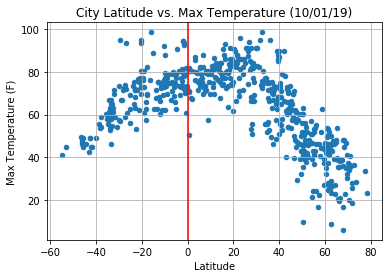

<Figure size 432x288 with 0 Axes>

In [18]:
today = time.strftime('%m/%d/%y')
title = 'City Latitude vs. Max Temperature'
ax = city_data.plot.scatter(x='Lat'
                       ,y='Max Temp'
                       ,grid=True)

ax.set_title(f'{title} ({today})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
ax.axvline(color='r')
plt.show()

# Save the Figure
plt.savefig(f"{title.replace(' ','_')}.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

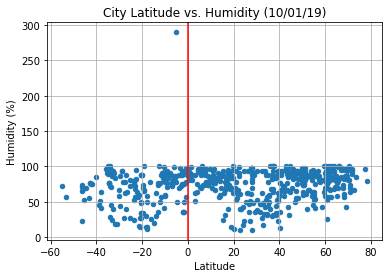

In [19]:
title = 'City Latitude vs. Humidity'
ax = city_data.plot.scatter(x='Lat'
                       ,y='Humidity'
                       ,grid=True)

ax.set_title(f'{title} ({today})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.axvline(color='r')

# Save the Figure
plt.savefig(f"{title.replace(' ','_')}.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

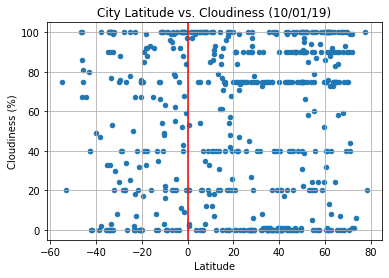

In [20]:
title = 'City Latitude vs. Cloudiness'
ax = city_data.plot.scatter(x='Lat'
                       ,y='Cloudiness'
                       ,grid=True)

ax.set_title(f'{title} ({today})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.axvline(color='r')

# Save the Figure
plt.savefig(f"{title.replace(' ','_')}.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

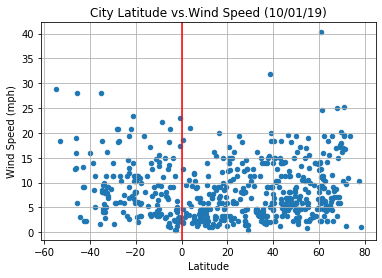

In [21]:
title = 'City Latitude vs.Wind Speed'
ax = city_data.plot.scatter(x='Lat'
                       ,y='Wind Speed'
                       ,grid=True)

ax.set_title(f'{title} ({today})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.axvline(color='r')

# Save the Figure
plt.savefig(f"{title.replace(' ','_')}.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot - Corrected

In [30]:
city_data.query('Humidity > 100')

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
353,paita,0,PE,1569967246,290,-5.09,-81.11,62.6,20.8


In [31]:
city_data_corrected = city_data[city_data['Humidity'] != 290]


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


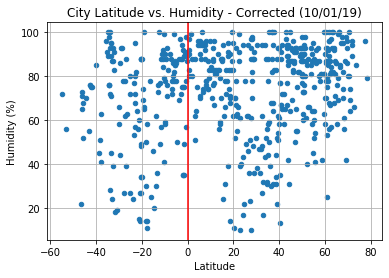

In [33]:
title = 'City Latitude vs. Humidity - Corrected'
ax = city_data_corrected.plot.scatter(x='Lat'
                       ,y='Humidity'
                       ,grid=True)

ax.set_title(f'{title} ({today})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.axvline(color='r')

# Save the Figure
plt.savefig(f"{title.replace(' ','_')}.png")

# Show the Figure
plt.show()

#### Scatter Matrix of All Observations (excluding Date)

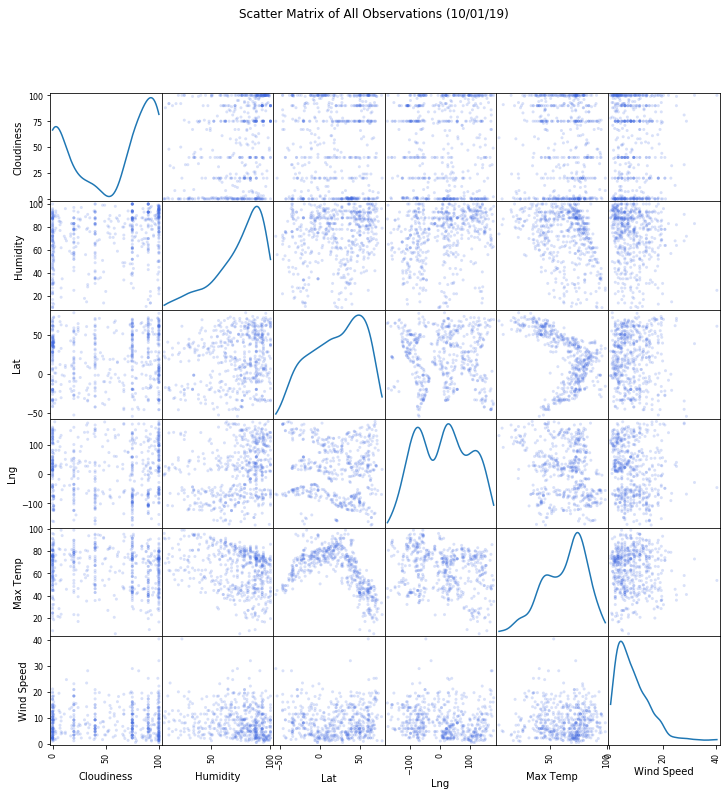

In [34]:
from pandas.plotting import scatter_matrix
title = 'Scatter Matrix of All Observations'

#drop our date column from this scatter_matrix seems useless since it's not historical data
city_data_nodate = city_data_corrected.drop(columns='Date')

scatter_matrix(city_data_nodate, figsize=(12,12), grid=True, diagonal='kde', alpha=0.2, color='royalblue')

plt.suptitle(f'{title} ({today})')
#plt.style.use('ggplot')

# Save the Figure
plt.savefig(f"{title.replace(' ','_')}.png")

# Show the Figure
plt.show()